## Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## Load extracted feature data set

In [2]:
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'Unet-dog-w-augment-2021-07-20/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "pca_compressed_features_rotations.csv"
#print(feature_path)


feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 345)


,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,-2.220373,-0.580341,2.196985,0.429946,-1.190011,-0.556154,-0.057688,2.375608,-1.625965,-1.712069,...,0.462818,0.316079,-0.321823,0.842478,-0.743848,-0.098608,-0.282070,0.0,1,551.510204
-01-CON-D02-L.png,3.588278,-5.578246,-1.880473,1.218523,-0.380675,-1.753572,1.704595,-3.040223,3.871198,-3.458008,...,-0.035210,-0.000080,0.052578,-0.035677,-0.039168,0.075543,-0.051822,2.0,1,628.466483
-01-CON-D04-L.png,6.719729,-2.803616,4.192650,-2.946225,-0.261083,-0.561100,1.399263,0.824084,-2.206604,1.160802,...,0.141556,0.057977,0.088372,0.049791,0.172414,0.331398,0.080480,4.0,1,642.328231
-01-CON-D07-L.png,7.815638,3.173802,7.775497,-7.055002,3.142376,-0.690588,-0.334183,1.799983,-2.099494,2.723915,...,-0.061198,0.045343,-0.065350,0.108031,0.002144,-0.186519,0.247000,7.0,1,530.589849
-01-CON-D09-L.png,5.877115,-5.169087,-0.448169,-0.707218,0.237454,-3.640721,2.773577,-0.029030,0.705921,-2.096029,...,0.045069,0.028248,-0.122069,-0.024971,-0.023254,-0.039033,-0.035337,9.0,1,469.101029


In [3]:
wound_area_df = feature_data[['Day', 'Dog_label', 'Area_mm2']]

for label in set(wound_area_df.Dog_label):
    temp = wound_area_df[wound_area_df.Dog_label == label]['Area_mm2'].iloc[0]
    wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \
        wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp

/var/folders/qg/n_qkcysd0vxfsffsxdxmyqq80000gn/T/ipykernel_24048/405826525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \


In [4]:
# Add the Area_precentage column back to feature dataset as a feature
feature_data['Area_precentage'] = wound_area_df['Area_precentage'].values
#print(feature_data)

## Read the clinical file for days until heal data

In [5]:
clinical_path = './data/all_dog_wounds_noAugmentation/'
clinical_df = pd.read_csv(clinical_path+"wound_image_labels.csv")

wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4
#print(clinical_df.loc[:,'Days_until_heal'])

fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

/var/folders/qg/n_qkcysd0vxfsffsxdxmyqq80000gn/T/ipykernel_24048/1111790543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4


In [6]:
print(wound_area_df[wound_area_df.Dog_label == 5])
#print(wound_area_df[wound_area_df.Dog_label == 6])

                             Day  Dog_label    Area_mm2  Area_precentage  \
-05-CON-D02-L.png            2.0          5  708.120000         1.000000   
-05-CON-D04-L.png            4.0          5  660.344828         0.932532   
-05-CON-D07-L.png            7.0          5  480.175781         0.678099   
-05-CON-D09-L.png            9.0          5  232.835556         0.328808   
-05-CON-D11-L.png           11.0          5  113.564444         0.160375   
-05-CON-D14-L.png           14.0          5   50.238715         0.070947   
-05-CON-D16-L.png           16.0          5   30.163265         0.042596   
-05-CON-D18-L.png           18.0          5   23.128889         0.032662   
-05-CON-D21-L.png           21.0          5    9.171076         0.012951   
-05-CON-D23-L.png           23.0          5    0.000000         0.000000   
-05-CON-D25-L.png           25.0          5    0.000000         0.000000   
-05-CON-D28-L.png           28.0          5    0.000000         0.000000   
-05-CON-D30-

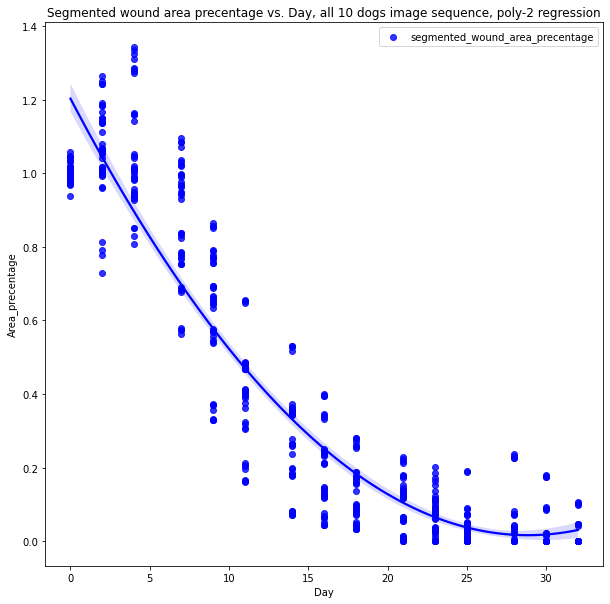

In [7]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Day', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Day, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Day, all 10 dogs image sequence.png")

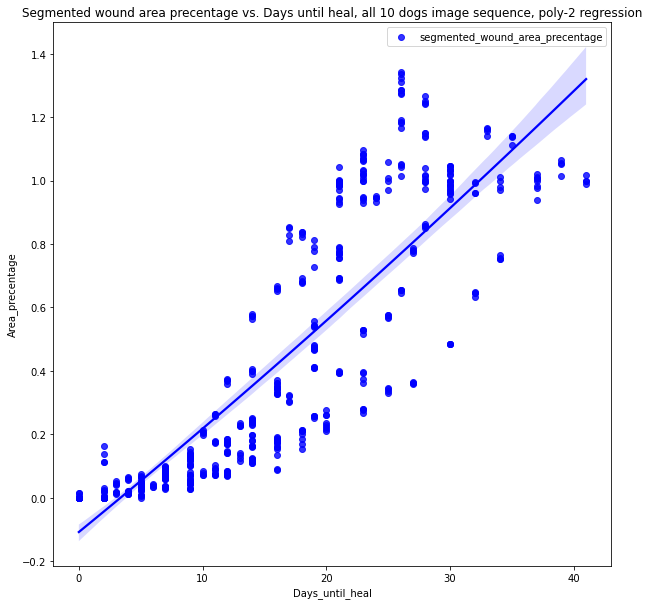

In [8]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Days_until_heal', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence.png")

## Separate training and test data set
1. Try use dog 9 and 10 as separate test image sequence
2. Try use the < 15 days image sequence as training input and > 15 days image sequence as test input (Tried, not working)


In [9]:
# manually set the random seed to define a replication
r_seed = 42

# manually set the number for cross validation
num_cv = 5

# manually set the test dog wound image sequences (9 or 10)
# [9, 10]
test_num = [9]

print("current random seed is: ", r_seed)
print("current test wound image sequence is: ", test_num)

current random seed is:  42
current test wound image sequence is:  [9]


### Part 1
Train the GPR on the 1-8 dog wound image sequence

In [10]:
# 1. use dog 9 and 10 as separate test image sequences, use dog 1-8 as training image sequences
#    Notice: dog 2 is a good example of chronic wound
#    Train data need to drop the Dog_label column, but save the Area_mm2 and Area_precentage columns as features
# Train
X_train = feature_data[feature_data['Dog_label'].isin(range(1,9))]
X_train = X_train.drop(['Dog_label'], axis = 1)
X_train = X_train.drop(['Day'], axis = 1)
print("The training dataset's shape is: ", X_train.shape)

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
X_test = feature_data[feature_data['Dog_label'].isin(test_num)]
X_test = X_test.drop(['Dog_label'], axis = 1)
X_test = X_test.drop(['Day'], axis = 1)
#print(X_test.shape)

# Label
Y_train = wound_area_df[wound_area_df['Dog_label'].isin(range(1,9))]
Y_train = Y_train['Days_until_heal']

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
Y_test = wound_area_df[wound_area_df['Dog_label'].isin(test_num)]
Y_test = Y_test['Days_until_heal']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 and 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
days_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Day']
print("The test wound image sequence's days:\n", days_seq)

#Area_prop_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Area_precentage']
Area_prop_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Area_precentage']
print("The test wound image sequence's Area proportion:\n", Area_prop_seq)

The training dataset's shape is:  (440, 344)
The test wound image sequence's days:
 -09-CON-D00-R.png              0.0
-09-CON-D02-R.png              2.0
-09-CON-D04-R.png              4.0
-09-CON-D07-R.png              7.0
-09-CON-D09-R.png              9.0
-09-CON-D11-R.png             11.0
-09-CON-D14-R.png             14.0
-09-CON-D16-R.png             16.0
-09-CON-D18-R.png             18.0
-09-CON-D21-R.png             21.0
-09-CON-D23-R.png             23.0
-09-CON-D25-R.png             25.0
-09-CON-D28-R.png             28.0
-09-CON-D30-R.png             30.0
rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
rotate180-09-CON-D04-R.png     4.0
rotate180-09-CON-D07-R.png     7.0
rotate180-09-CON-D09-R.png     9.0
rotate180-09-CON-D11-R.png    11.0
rotate180-09-CON-D14-R.png    14.0
rotate180-09-CON-D16-R.png    16.0
rotate180-09-CON-D18-R.png    18.0
rotate180-09-CON-D21-R.png    21.0
rotate180-09-CON-D23-R.png    23.0
rotate180-09-CON-D25-R.png    25.0
rotate

### Part 2
Train the GPR on all dog wound image sequences' (1 - 10) day 1-15 sequences.
Predict all all dog wound image sequences' (1 - 10) day 16-32 sequences.

In [11]:
# 2. use the < 16 days image sequence as training input and > 16 days image sequence as test input
# Train
#X_train = feature_data[feature_data['Day'].isin(range(0,16))]
#X_train = X_train.drop(['Dog_label','Area_mm2'], axis = 1)

#X_test = feature_data[feature_data['Day'].isin(range(16,35))]
#X_test = X_test[X_test['Dog_label'].isin([test_num])]

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
#X_test = X_test.drop(['Dog_label','Area_mm2'], axis = 1)
# Label
#Y_train = wound_area_df[wound_area_df['Day'].isin(range(0,16))]
#Y_train = Y_train['Area_precentage']

#Y_test = wound_area_df[wound_area_df['Day'].isin(range(16, 35))]
#Y_test = Y_test[Y_test['Dog_label'].isin([test_num])]

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
#Y_test = Y_test['Area_precentage']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 or 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
#print("The test wound image sequence's days:\n", days_seq)

## Random Forest Regression
Define the RandomForestRegressor object.

### Random search for RF regressor

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 60)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 4, 6, 8, 10, 12, 13, 15, 17, 19, 21, 23, 25, 26, 28, 30, 32, 34, 36, 37, 39, 41, 43, 45, 47, 49, 50, 52, 54, 56, 58, 60, 61, 63, 65, 67, 69, 71, 73, 74, 76, 78, 80, 82, 84, 85, 87, 89, 91, 93, 95, 97, 98, 100, 102, 104, 106, 108, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]}


In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rs = RandomForestRegressor(random_state = r_seed)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rs_random = RandomizedSearchCV(estimator = rs, param_distributions = random_grid, n_iter = 200, cv = num_cv, verbose=2, random_state=r_seed, n_jobs = -1)
# Fit the random search model
rs_random.fit(X_train, Y_train)
print(rs_random.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'n_estimators': 450, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 19, 'bootstrap': True}


### Grid search for RF regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(400, 500, 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [18,19,20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [9,10,11]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gp = RandomForestRegressor(random_state = r_seed)

# print parameters
print(gp.get_params())

# scores for regression
#
#Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
#'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 
#'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 
#'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 
#'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 
#'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 
#'roc_auc', 'v_measure_score']

grid_gp = GridSearchCV(estimator = gp, cv=num_cv, param_grid=param_grid, n_jobs=-1, scoring = 'r2', verbose=10)
grid_gp.fit(X_train, Y_train)

print(grid_gp.best_params_)
gp = grid_gp.best_estimator_

print("The CV results are: ", grid_gp.best_score_)

# Make the prediction on test set.
Y_pred = gp.predict(X_test)
#print(Y_pred)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=560; total time=   3.2s
[CV] END bootstrap=True, max_depth=41, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=450; total time=   1.7s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=450; total time=   1.8s
[CV] END boo

[CV] END bootstrap=False, max_depth=69, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=450; total time=   3.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=560; total time=   3.1s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=450; total time=   1.8s
[CV] END bootstrap=False, max_depth=58, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=890; total time= 1.2min
[CV] END bootstrap=False, max_depth=56, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   1.5s
[CV] END bootstrap=False, max_depth=56, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   1.6s
[CV] END bootstrap=False, max_depth=56, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, m

[CV] END bootstrap=False, max_depth=69, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=450; total time=   3.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=41, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=560; total time=   3.0s
[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=450; total time=  20.9s
[CV] END bootstrap=False, max_depth=58, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=890; total time= 1.2min
[CV] END bootstrap=False, max_depth=102, max_fe

[CV] END bootstrap=False, max_depth=69, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=450; total time=   3.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=560; total time=   3.0s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=450; total time=   1.7s
[CV] END bootstrap=False, max_depth=58, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=890; total time= 1.2min
[CV] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=670; total time=  23.5s
[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=340; total time=  12.7s
[CV] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=230; total time=   1.0s
[CV] END bootstrap=True, max_depth=6, max_fe

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=560; total time=   3.2s
[CV] END bootstrap=True, max_depth=41, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=560; total time=   2.9s
[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=450; total time=  21.2s
[CV] END bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=560; total time=  23.1s
[CV] END bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=560; total time=  22.8s
[CV] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=670; total time=  23.5s
[CV] END bootstrap=False, max_depth=102, max_

[CV] END bootstrap=False, max_depth=69, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=450; total time=   3.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=41, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=560; total time=   3.0s
[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=450; total time=  21.3s
[CV] END bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=560; total time=  23.0s
[CV] END bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=560; total time=  22.8s
[CV] END bootstrap=True, max_depth=34, max_fe

[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=120; total time=   7.9s
[CV] END bootstrap=False, max_depth=58, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1000; total time=   4.9s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=560; total time=   3.2s
[CV] END bootstrap=True, max_depth=41, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=560; total time=   2.9s
[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=450; total time=  21.0s
[CV] END bootstrap=False, max_depth=58, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=890; total time= 1.2min
[CV] END bootstrap=True, max_depth=87, max_

[CV] END bootstrap=False, max_depth=69, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=450; total time=   3.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=560; total time=   3.0s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=450; total time=   1.8s
[CV] END bootstrap=False, max_depth=58, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=890; total time= 1.2min
[CV] END bootstrap=True, max_depth=34, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=670; total time=  23.6s
[CV] END bootstrap=True, max_depth=87, max_fea

[CV] END bootstrap=False, max_depth=69, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=34, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=560; total time=   3.5s
[CV] END bootstrap=False, max_depth=34, max_f

[CV 3/5; 70/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=445[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=780; total time=   4.4s
[CV] END bootstrap=False, max_depth=34, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=450; total time=   2.4s
[CV] END bootstrap=False, max_depth=34, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=450; total time=   2.3s
[CV] END bootstrap=False, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=  18.0s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=52, max_feat

[CV] END bootstrap=True, max_depth=97, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=560; total time=   2.1s
[CV] END bootstrap=True, max_depth=97, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=560; total time=   2.1s
[CV] END bootstrap=True, max_depth=97, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=560; total time=   2.1s
[CV] END bootstrap=False, max_depth=84, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=670; total time=  54.0s
[CV] END bootstrap=False, max_depth=67, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230; total time=  18.9s
[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=890; total time=   5.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   9.4s
[CV] END bootstrap=False, max_depth=67, m

[CV] END bootstrap=False, max_depth=37, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=670; total time=   4.3s
[CV] END bootstrap=False, max_depth=65, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=  18.1s
[CV] END bootstrap=False, max_depth=65, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=  18.3s
[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=450; total time=  17.5s
[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=450; total time=  17.9s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=120; total time=   7.8s
[CV] END bootstrap=False, max_depth=58, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1000; total time=   5.1s
[CV 1/5; 2/480] START bootstrap=True, max_

[CV] END bootstrap=False, max_depth=37, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=670; total time=   4.3s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1000; total time=  35.8s
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=890; total time=  57.9s
[CV 5/5; 1/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=400
[CV 5/5; 1/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=400;, score=0.902 total time=  17.5s
[CV 3/5; 3/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=410
[CV 3/5; 3/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=410;, score=0.918 total time=  16.6s
[CV 1/5; 5/

[CV 2/5; 1/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=400
[CV 2/5; 1/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=400;, score=0.903 total time=  17.2s
[CV 4/5; 2/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=405
[CV 4/5; 2/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=405;, score=0.924 total time=  16.6s
[CV 2/5; 4/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=415
[CV 2/5; 4/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=415;, score=0.903 total time=  16.5s
[CV 5/5; 5/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=420
[CV 

[CV 3/5; 6/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=425
[CV 3/5; 6/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=425;, score=0.918 total time=  18.1s
[CV 1/5; 8/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=435
[CV 1/5; 8/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=435;, score=0.924 total time=  18.8s
[CV 4/5; 9/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=440
[CV 4/5; 9/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=440;, score=0.924 total time=  18.6s
[CV 2/5; 11/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=450
[CV

[CV 1/5; 12/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=455
[CV 1/5; 12/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=455;, score=0.924 total time=  12.6s
[CV 4/5; 13/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=460
[CV 4/5; 13/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=460;, score=0.924 total time=  11.4s
[CV 2/5; 15/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=470
[CV 2/5; 15/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=470;, score=0.904 total time=  11.4s
[CV 5/5; 16/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=4


[CV 3/5; 70/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=445;, score=0.917 total time=  11.9s
[CV 1/5; 72/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=455
[CV 1/5; 72/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=455;, score=0.924 total time=  12.6s
[CV 4/5; 73/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=460
[CV 4/5; 73/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=460;, score=0.924 total time=  12.5s
[CV 2/5; 75/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=470
[CV 2/5; 75/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=47

[CV 3/5; 75/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=470
[CV 3/5; 75/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=470;, score=0.917 total time=  12.8s
[CV 1/5; 77/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=480
[CV 1/5; 77/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=480;, score=0.924 total time=  13.3s
[CV 4/5; 78/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=485
[CV 4/5; 78/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=485;, score=0.923 total time=  13.1s
[CV 2/5; 80/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=4

[CV 1/5; 79/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=490;, score=0.924 total time=  13.2s
[CV 4/5; 80/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=495
[CV 4/5; 80/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=495;, score=0.923 total time=  13.3s
[CV 2/5; 82/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=405
[CV 2/5; 82/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=405;, score=0.903 total time=  10.8s
[CV 5/5; 83/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=410
[CV 5/5; 83/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators

[CV 2/5; 84/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=415;, score=0.903 total time=  11.7s
[CV 5/5; 85/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=420
[CV 5/5; 85/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=420;, score=0.903 total time=  11.2s
[CV 3/5; 87/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=430
[CV 3/5; 87/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=430;, score=0.917 total time=  11.6s
[CV 1/5; 89/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=440
[CV 1/5; 89/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimat

[CV 4/5; 87/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=430;, score=0.924 total time=  11.7s
[CV 2/5; 89/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=440
[CV 2/5; 89/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=440;, score=0.903 total time=  11.6s
[CV 5/5; 90/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=445
[CV 5/5; 90/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=445;, score=0.902 total time=  12.1s
[CV 3/5; 92/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=455
[CV 3/5; 92/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimat

[CV 4/5; 91/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=450
[CV 4/5; 91/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=450;, score=0.924 total time=  12.1s
[CV 2/5; 93/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=460
[CV 2/5; 93/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=460;, score=0.903 total time=  12.7s
[CV 5/5; 94/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=465
[CV 5/5; 94/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=465;, score=0.902 total time=  12.7s
[CV 3/5; 96/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estim

[CV 5/5; 96/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=475
[CV 5/5; 96/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=475;, score=0.902 total time=  12.6s
[CV 3/5; 98/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=485
[CV 3/5; 98/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=485;, score=0.916 total time=  13.0s
[CV 1/5; 100/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=495
[CV 1/5; 100/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=495;, score=0.924 total time=  13.5s
[CV 4/5; 101/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_es

[CV 4/5; 100/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=495
[CV 4/5; 100/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=495;, score=0.924 total time=  14.0s
[CV 3/5; 102/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=405
[CV 3/5; 102/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=405;, score=0.918 total time=  10.8s
[CV 1/5; 104/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=415
[CV 1/5; 104/480] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=415;, score=0.923 total time=  10.9s
[CV 4/5; 105/480] START bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=11, 

[CV 1/5; 158/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=485;, score=0.923 total time=  13.1s
[CV 4/5; 159/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=490
[CV 4/5; 159/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=490;, score=0.924 total time=  13.3s
[CV 2/5; 161/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=400
[CV 2/5; 161/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=400;, score=0.904 total time=  10.6s
[CV 5/5; 162/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=405
[CV 5/5; 162/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_

[CV 2/5; 163/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=410
[CV 2/5; 163/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=410;, score=0.904 total time=  10.8s
[CV 5/5; 164/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=415
[CV 5/5; 164/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=415;, score=0.903 total time=  11.2s
[CV 3/5; 166/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=425
[CV 3/5; 166/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=425;, score=0.918 total time=  11.7s
[CV 1/5; 168/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, 

[CV 1/5; 167/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=430;, score=0.923 total time=  11.6s
[CV 4/5; 168/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=435
[CV 4/5; 168/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=435;, score=0.924 total time=  12.6s
[CV 2/5; 170/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=445
[CV 2/5; 170/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=445;, score=0.904 total time=  12.0s
[CV 5/5; 171/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=450
[CV 5/5; 171/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_

[CV 1/5; 172/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=455;, score=0.923 total time=  12.3s
[CV 4/5; 173/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=460
[CV 4/5; 173/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=460;, score=0.924 total time=  12.4s
[CV 2/5; 175/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=470
[CV 2/5; 175/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=470;, score=0.905 total time=  12.3s
[CV 5/5; 176/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=475
[CV 5/5; 176/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_

[CV 5/5; 175/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=470;, score=0.902 total time=  12.6s
[CV 3/5; 177/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=480
[CV 3/5; 177/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=480;, score=0.917 total time=  12.7s
[CV 1/5; 179/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=490
[CV 1/5; 179/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=490;, score=0.923 total time=  13.3s
[CV 4/5; 180/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=495
[CV 4/5; 180/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_

[CV 3/5; 179/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=490
[CV 3/5; 179/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=11, n_estimators=490;, score=0.917 total time=  13.1s
[CV 1/5; 181/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=400
[CV 1/5; 181/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=400;, score=0.923 total time=  11.1s
[CV 3/5; 182/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=405
[CV 3/5; 182/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=405;, score=0.918 total time=  11.1s
[CV 1/5; 184/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_est

[CV 1/5; 185/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=420
[CV 1/5; 185/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=420;, score=0.923 total time=  11.6s
[CV 4/5; 186/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=425
[CV 4/5; 186/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=425;, score=0.924 total time=  11.8s
[CV 2/5; 188/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=435
[CV 2/5; 188/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=435;, score=0.903 total time=  12.0s
[CV 5/5; 189/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estim

[CV 2/5; 189/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=440
[CV 2/5; 189/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=440;, score=0.903 total time=  12.2s
[CV 5/5; 190/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=445
[CV 5/5; 190/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=445;, score=0.902 total time=  12.4s
[CV 3/5; 192/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=455
[CV 3/5; 192/480] END bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=455;, score=0.917 total time=  12.9s
[CV 1/5; 194/480] START bootstrap=True, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estim

[CV 1/5; 246/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=425;, score=0.924 total time=  12.8s
[CV 4/5; 247/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=430
[CV 4/5; 247/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=430;, score=0.924 total time=  12.7s
[CV 2/5; 249/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=440
[CV 2/5; 249/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=440;, score=0.903 total time=  13.1s
[CV 5/5; 250/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=445
[CV 5/5; 250/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimat

[CV 1/5; 251/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=450
[CV 1/5; 251/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=450;, score=0.924 total time=  13.4s
[CV 4/5; 252/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=455
[CV 4/5; 252/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=455;, score=0.924 total time=  13.4s
[CV 2/5; 254/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=465
[CV 2/5; 254/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=465;, score=0.903 total time=  13.5s
[CV 5/5; 255/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estim

[CV 1/5; 255/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=470;, score=0.924 total time=  13.7s
[CV 4/5; 256/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=475
[CV 4/5; 256/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=475;, score=0.924 total time=  14.5s
[CV 2/5; 258/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=485
[CV 2/5; 258/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=485;, score=0.904 total time=  14.3s
[CV 5/5; 259/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=490
[CV 5/5; 259/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimat

[CV 1/5; 260/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=495;, score=0.924 total time=  14.5s
[CV 4/5; 261/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400
[CV 4/5; 261/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.924 total time=  11.4s
[CV 2/5; 263/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=410
[CV 2/5; 263/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=410;, score=0.904 total time=  11.7s
[CV 5/5; 264/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=415
[CV 5/5; 264/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_e

[CV 3/5; 264/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=415;, score=0.918 total time=  12.0s
[CV 1/5; 266/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=425
[CV 1/5; 266/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=425;, score=0.923 total time=  12.3s
[CV 4/5; 267/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430
[CV 4/5; 267/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430;, score=0.924 total time=  12.2s
[CV 2/5; 269/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=440
[CV 2/5; 269/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_

[CV 3/5; 267/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430
[CV 3/5; 267/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430;, score=0.918 total time=  12.2s
[CV 1/5; 269/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=440
[CV 1/5; 269/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=440;, score=0.923 total time=  12.6s
[CV 4/5; 270/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=445
[CV 4/5; 270/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=445;, score=0.924 total time=  12.8s
[CV 2/5; 272/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, 

[CV 1/5; 273/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=460
[CV 1/5; 273/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=460;, score=0.923 total time=  13.5s
[CV 4/5; 274/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=465
[CV 4/5; 274/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=465;, score=0.924 total time=  13.5s
[CV 2/5; 276/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=475
[CV 2/5; 276/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=475;, score=0.905 total time=  13.6s
[CV 5/5; 277/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, 

[CV 5/5; 276/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=475
[CV 5/5; 276/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=475;, score=0.902 total time=  13.7s
[CV 3/5; 278/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=485
[CV 3/5; 278/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=485;, score=0.917 total time=  18.7s
[CV 1/5; 280/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=495
[CV 1/5; 280/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=495;, score=0.923 total time=  16.3s
[CV 4/5; 281/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=11, 

[CV 1/5; 334/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=465;, score=0.924 total time=  13.2s
[CV 4/5; 335/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=470
[CV 4/5; 335/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=470;, score=0.924 total time=  13.4s
[CV 2/5; 337/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=480
[CV 2/5; 337/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=480;, score=0.904 total time=  13.3s
[CV 5/5; 338/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=485
[CV 5/5; 338/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_

[CV 1/5; 339/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=490
[CV 1/5; 339/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=490;, score=0.924 total time=  14.3s
[CV 4/5; 340/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=495
[CV 4/5; 340/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=495;, score=0.924 total time=  14.0s
[CV 2/5; 342/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=405
[CV 2/5; 342/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=405;, score=0.903 total time=  10.9s
[CV 5/5; 343/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, 

[CV 2/5; 343/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=410;, score=0.904 total time=  11.1s
[CV 5/5; 344/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=415
[CV 5/5; 344/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=415;, score=0.903 total time=  11.4s
[CV 3/5; 346/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=425
[CV 3/5; 346/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=425;, score=0.918 total time=  12.3s
[CV 1/5; 348/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=435
[CV 1/5; 348/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_

[CV 5/5; 347/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=430;, score=0.903 total time=  12.0s
[CV 3/5; 349/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=440
[CV 3/5; 349/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=440;, score=0.918 total time=  12.2s
[CV 1/5; 351/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=450
[CV 1/5; 351/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=450;, score=0.924 total time=  12.7s
[CV 4/5; 352/480] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=455
[CV 4/5; 352/480] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_

{'bootstrap': True, 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 425}
The CV results are:  0.9144397758293092


In [15]:
#print("coefficients of training data points (features) in kernel space\n", gp.alpha_)

In [16]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
rotate180-09-CON-D04-R.png     4.0
rotate180-09-CON-D07-R.png     7.0
rotate180-09-CON-D09-R.png     9.0
rotate180-09-CON-D11-R.png    11.0
rotate180-09-CON-D14-R.png    14.0
rotate180-09-CON-D16-R.png    16.0
rotate180-09-CON-D18-R.png    18.0
rotate180-09-CON-D21-R.png    21.0
rotate180-09-CON-D23-R.png    23.0
rotate180-09-CON-D25-R.png    25.0
rotate180-09-CON-D28-R.png    28.0
rotate180-09-CON-D30-R.png    30.0
Name: Day, dtype: float64
Test set results are:  0.9368352020569287


### Part 1 plots
connected line and poly-2 regression line

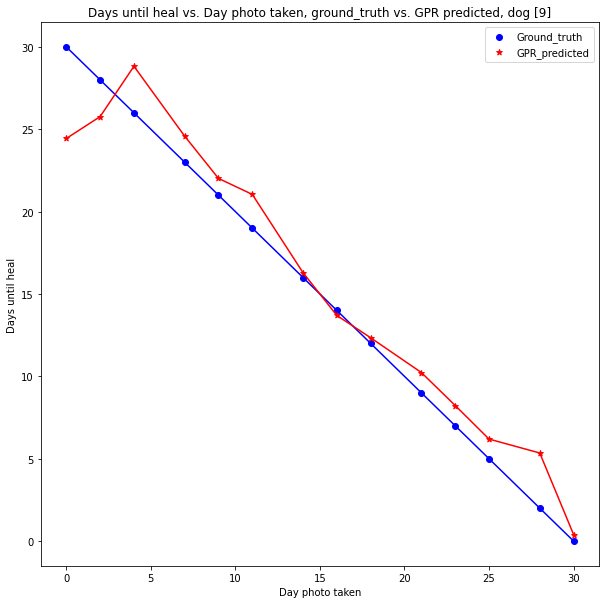

In [17]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = days_seq[14:28] , y = Y_test[14:28], color = 'blue', marker = 'o', label = "Ground_truth")
plt.plot(days_seq[14:28] , Y_test[14:28], linestyle='solid',color='blue')#, label='Ground_truth')

plt.scatter(x = days_seq[14:28] , y = Y_pred[14:28], color = 'red', marker = '*', label = "GPR_predicted")
plt.plot(days_seq[14:28] , Y_pred[14:28], linestyle='solid',color='red')#, label='GPR_predicted')

plt.title("Days until heal vs. Day photo taken, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Day photo taken")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted,dog {},days until heal,connected_lines, 180rotation_images.png".format(test_num))

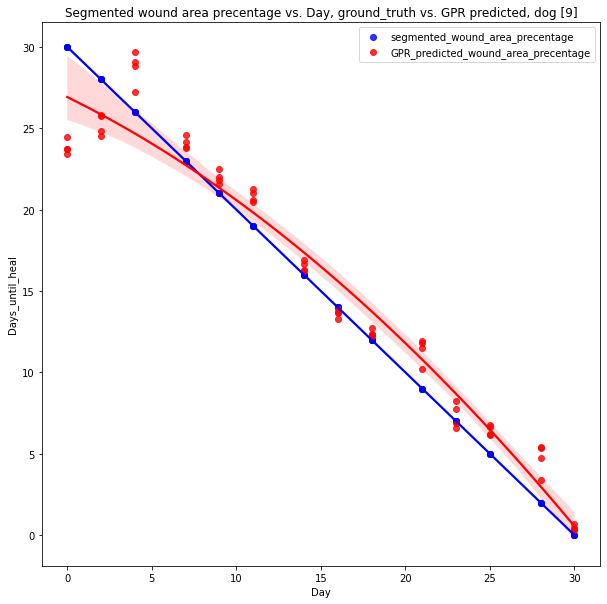

In [18]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=days_seq , y=Y_test, order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=days_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_wound_area_precentage', ax=ax)

ax.set(title='Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

#fig.savefig(fig_path + "ground_truth vs. GPR predicted, dog {}, poly2_regression.png".format(test_num))

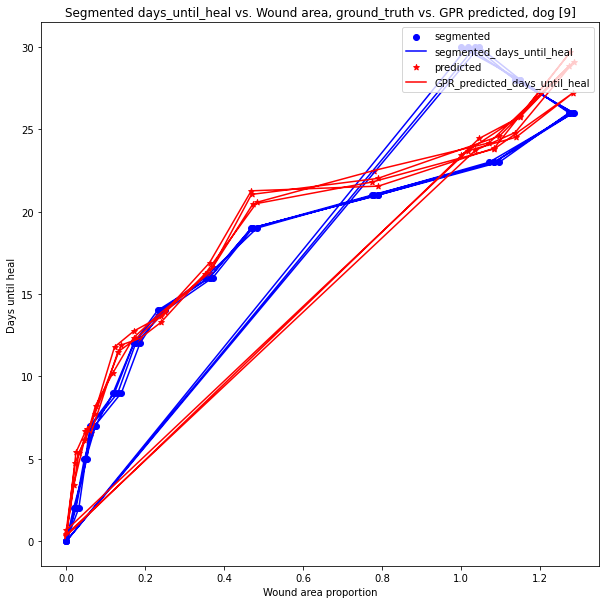

In [19]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = Area_prop_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
plt.plot(Area_prop_seq , Y_test, linestyle='solid',color='blue', label='segmented_days_until_heal')

plt.scatter(x = Area_prop_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
plt.plot(Area_prop_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_days_until_heal')

plt.title("Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Wound area proportion")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, connected_lines.png".format(test_num))

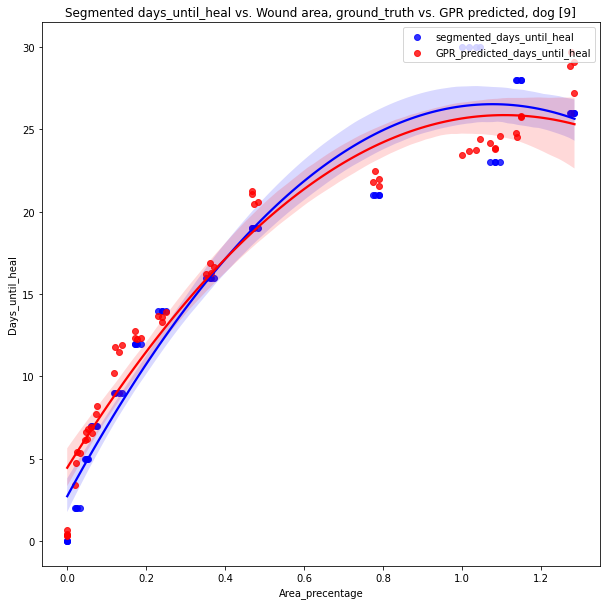

In [20]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=Area_prop_seq , y=Y_test, order = 2,
            color='blue', label='segmented_days_until_heal', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=Area_prop_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_days_until_heal', ax=ax)

ax.set(title='Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, poly2_regression.png".format(test_num))

### Part 2 plots
connected line and poly-2 regression line

In [21]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

#fig, ax = plt.subplots(figsize=(10,10))

#plt.scatter(x = days_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
#plt.plot(days_seq , Y_test, linestyle='solid',color='blue', label='segmented_wound_area_precentage')

#plt.scatter(x = days_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
#plt.plot(days_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_wound_area_precentage')

#plt.axvline(x = 16, linestyle = '--', c = 'black')

#plt.title("Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}".format(test_num))
#plt.xlabel("Day")
#plt.ylabel("Area_precentage")
#ax.legend(loc='upper right')
#plt.show()

#fig.tight_layout()
#fig.savefig(fig_path + "(Train on < 16 days' all wound sequences)ground_truth vs. GPR predicted, dog {}, connected_lines.png".format(test_num))